In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I'm looking at a Hamiltonian for a system. Let me parse through it step by step to answer the questions and develop the appropriate Python code.

The Hamiltonian consists of three terms:
1. A non-interacting term: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$, where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$
2. A Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. A Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's address each question in turn:

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see the creation and annihilation operators are indexed by momentum k and a quantum number s. This suggests that the flavors in our system are:

1. s: This appears to

In [7]:
print(generated_code['thinking'])

Alright, I'm looking at a Hamiltonian for a system. Let me parse through it step by step to answer the questions and develop the appropriate Python code.

The Hamiltonian consists of three terms:
1. A non-interacting term: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$, where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$
2. A Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. A Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's address each question in turn:

## QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see the creation and annihilation operators are indexed by momentum k and a quantum number s. This suggests that the flavors in our system are:

1. s: This appears to represent some kind of quantum index, likely spin or

In [8]:
print(generated_code['text'])

# Answer

I'll systematically analyze the Hamiltonian and develop the requested class.

## 1) Dimension and Basis Order

Tuple of Flavors (D) = (2,)
Basis Order:
0: quantum_index. Order: s=0, s=1

The Hamiltonian shows operators indexed by momentum k and a quantum number s. Since s is the only flavor index (aside from the momentum k), and looking at the summations over s and s', I infer that s must have 2 values, corresponding to two quantum states (possibly spin up/down or two orbital types).

## 2) EXP-VAL DEPENDENT TERMS

```
EXP-VAL DEPENDENT TERMS:
- \langle c_{k,s}^\dagger c_{k,s}\rangle: Mean of exp_val[s, s, :]
- \langle c_{k,s}^\dagger c_{k,s'} \rangle: Value of exp_val[s, s', k]
```

TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ -> H[s, s, k], NI (energy dispersion term)
- $\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ -> H[s', s', k'], I (Hartree term)
- $-\frac{1}{N}\sum_{s,s'}\

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice system with momentum-dependent interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t':1.0, 'U0':1.0, 'T':0, 'a':1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Lattice symmetry
        self.D = (2,)  # Number of quantum states
        self.basis_order = {'0': 'quantum_index'}  # The 0th index represents quantum index (s)
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # Temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_8.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

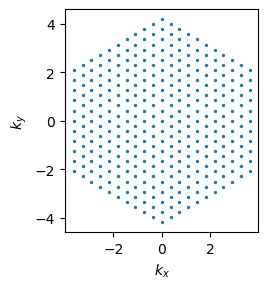

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

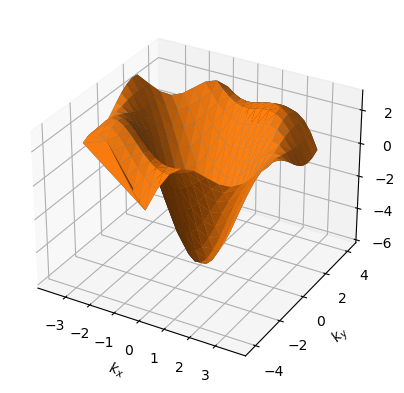

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

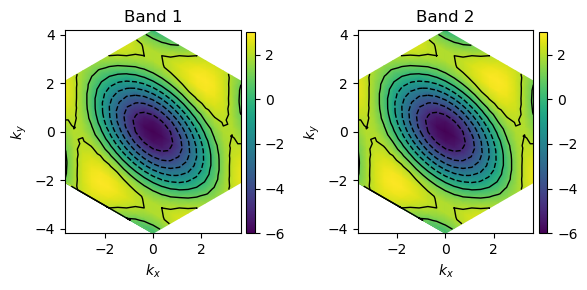

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

/mnt/d/Cornell/HartreeFock_GPT/test_coding/automation/2110_11330/code_2110_11330_8.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  n_avg[s] = np.mean(exp_val[s, s, :])


Convergence reached at iteration 1


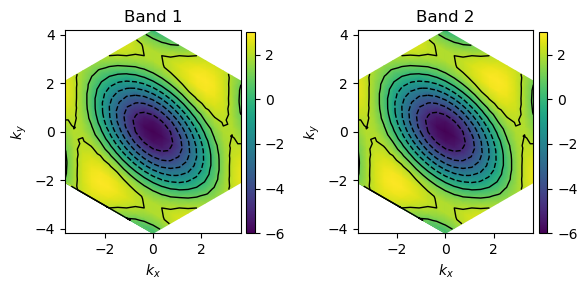

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 5


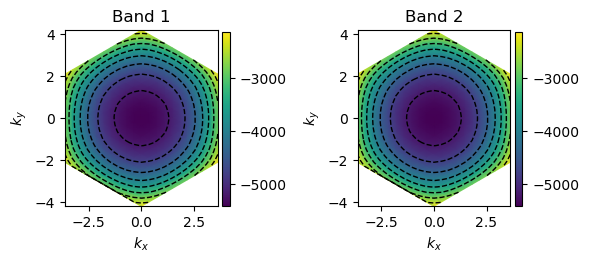

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -3306.70
U/T is 2179.44
mean_U is 2156.47


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric for a triangular lattice Hamiltonian using the Hartree-Fock method.

The image shows a hexagonal arrangement of points in momentum space, which represents the first Brillouin zone of a 2D triangular lattice. The x-axis is labeled kx and the y-axis is labeled ky, with values ranging approximately from -4 to 4 on both axes.

Let's check the rubric points:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image indeed shows a momentum space mesh with discrete k-points arranged in a hexagonal pattern, which is the correct shape for the first Brillouin zone of a triangular lattice. The hexagonal shape with points distributed throughout is consistent with a proper k-space discretization for numerical calculations.

2. "You need to check the point group symmetry."
   - The triangular lattice has a hexagonal Brillouin zone w

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the given image and determine if it meets the requirements in the rubric for evaluating band structure plots on a triangular lattice.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see the Brillouin zone boundary forms a hexagon, which is indeed the expected shape for a triangular lattice. The boundary extends to approximately ±3 in both kx and ky directions and has a hexagonal shape. This is correct for a triangular lattice.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
In the false color plot, the highest energy regions (yellow) appear to be in the corners of the hexagonal Brillouin zone. There seems to be 6 yellow regions at the vertices of the hexagon.

2.2 Trace the pattern of energy variation across the zone
The ener

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The Brillouin zone boundary shown in the plots appears to be hexagonal, which is indeed what is expected for a triangular lattice in real space. The reciprocal lattice of a triangular lattice forms a hexagonal Brillouin zone. The plots show a hexagonal boundary extending from approximately -3 to +3 in both kx and ky directions. ✓

2. Next, examine the symmetry of the energy distribution shown by the false color plot:
    2.1 Identify the highest energy regions (yellow)
    
The highest energy regions (shown in yellow) appear at the corners of the hexagonal Brillouin zone boundary.

    2.2 Trace the pattern of energy variation across the zone
    
The energy variation forms an elliptical pattern, with the lowest energy (purple/dark blue) at the center (k = 0),

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

I need to analyze the image which shows false color plots of band structures in the first Brillouin zone after a self-consistent Hartree-Fock calculation. Let me systematically go through the rubric points:

1. **Brillouin Zone Shape**: 
The image shows two plots (Band 1 and Band 2) with hexagonal boundaries, which is indeed the expected shape for a triangular lattice. The Brillouin zone for a triangular lattice should be hexagonal, so this matches expectations. ✓

2. **Symmetry of the Energy Distribution**:
   
   2.1 **Highest Energy Regions**: 
   The highest energy regions (yellow) appear at the vertices of the hexagon in both Band 1 and Band 2. ✓
   
   2.2 **Energy Variation Pattern**: 
   The energy decreases from the vertices (yellow, around -3000) toward the center (dark purple, around -5500). The pattern shows concentric contours that follow the hexagonal shape, with the energy gradually decreasing toward the center. ✓
   


In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
